In [2]:
# Export all libraries need for text analytics

!pip install nltk
!pip install spacy
!pip install gensim
!pip install transformers
!pip install sklearn


In [3]:
!pip install sastrawi

In [4]:
#  Export  libraries need for text analytics

import nltk
import spacy
import gensim
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [5]:
import pandas as pd

def read_csv_with_error_handling(file_path):
  """Reads a CSV file and ignores errors during parsing.

  Args:
    file_path: The path to the CSV file.

  Returns:
    A pandas DataFrame containing the data from the CSV file.
  """
  try:
    # Replace 'error_bad_lines' with 'on_bad_lines' and set it to 'skip' to ignore bad lines
    df = pd.read_csv(file_path, on_bad_lines='skip')
    return df
  except pd.errors.ParserError as e:
    print(f"Error parsing CSV file: {e}")
    return pd.DataFrame()  # Return an empty DataFrame if there's an error

# Example usage:
try:
  df = read_csv_with_error_handling('/Users/irhamniali/Library/CloudStorage/OneDrive-UNTSystem/PostDoc_project/NewsClass/Consal2025/data/clean_dat_update.csv')
  if not df.empty:
    print("CSV file read successfully.")
    # Perform further processing with the DataFrame 'df'
except FileNotFoundError:
  print("File not found.")

CSV file read successfully.


In [6]:
# show column and print the df

if not df.empty:
  print(df.columns)
  print(df)


Index(['No', 'Date', 'Title', 'Media Name'], dtype='object')
            No         Date  \
0      14397.0  25 Sep 2024   
1        642.0  29 Mar 2021   
2      12788.0  31 May 2024   
3       7790.0  28 Feb 2023   
4       6062.0  27 Sep 2022   
...        ...          ...   
14522      NaN          NaN   
14523      NaN          NaN   
14524      NaN          NaN   
14525      NaN          NaN   
14526      NaN          NaN   

                                                   Title        Media Name  
0        -- Perpusnas Beri Penghargaan Nugra Jasa Dharma        Warta Kota  
1      'Amazing', Ada Kampung Ingris di Atas Bukit di...      Liputan6.com  
2      ‘Fotografer dan Dosanya’ Juarai Lomba Cerpen P...  bantennews.co.id  
3      ‘Gelora’ Bikin Tingkat Literasi SMPN 2 Bojongm...    radarbekasi.id  
4      ‘Kamar Kinclong Princess Tania’ Gemakan Semang...      nusabali.com  
...                                                  ...               ...  
14522                      

In [7]:
# clean the NaN data

if not df.empty:
  # Remove rows with NaN values in any column
  df_cleaned = df.dropna()

  # Print the cleaned DataFrame
  print("Cleaned DataFrame:")
  print(df_cleaned)

  # Alternatively, you can fill NaN values with a specific value (e.g., 0)
  # df_cleaned = df.fillna(0)

  # Or fill NaN values with the mean/median of the column
  # df_cleaned = df.fillna(df.mean())

Cleaned DataFrame:
            No         Date  \
0      14397.0  25 Sep 2024   
1        642.0  29 Mar 2021   
2      12788.0  31 May 2024   
3       7790.0  28 Feb 2023   
4       6062.0  27 Sep 2022   
...        ...          ...   
12533  12193.0  24 Mar 2024   
12534  12187.0  22 Mar 2024   
12535  11801.0  12 Feb 2024   
12536   3125.0   1 Dec 2021   
12537   3126.0   1 Dec 2021   

                                                   Title           Media Name  
0        -- Perpusnas Beri Penghargaan Nugra Jasa Dharma           Warta Kota  
1      'Amazing', Ada Kampung Ingris di Atas Bukit di...         Liputan6.com  
2      ‘Fotografer dan Dosanya’ Juarai Lomba Cerpen P...     bantennews.co.id  
3      ‘Gelora’ Bikin Tingkat Literasi SMPN 2 Bojongm...       radarbekasi.id  
4      ‘Kamar Kinclong Princess Tania’ Gemakan Semang...         nusabali.com  
...                                                  ...                  ...  
12533  Zardi Syahrir Ingatkan Tim Kreatif DPRD S

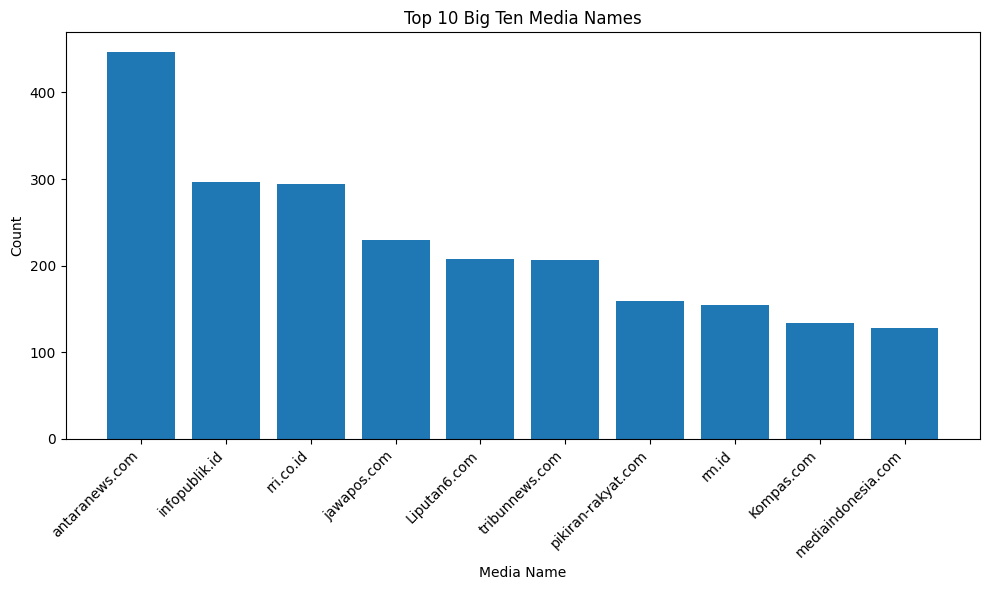

In [8]:
# count only the big 10  the media name and make a bar chart

if not df.empty:
  # Assuming 'Media Name' is a column in your DataFrame
  big_ten_media_counts = df['Media Name'].value_counts()

  # Select only the top 10 media names
  top_10_big_ten_media = big_ten_media_counts.head(10)

  # Create a bar chart
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10, 6))
  plt.bar(top_10_big_ten_media.index, top_10_big_ten_media.values)
  plt.xlabel('Media Name')
  plt.ylabel('Count')
  plt.title('Top 10 Big Ten Media Names')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
  plt.tight_layout()  # Adjust layout for better spacing
  plt.show()

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string

if not df.empty:
  # Extract the 'Title' column
  titles = df['Title']

  # Convert NaNs or floats to strings before applying split
  titles = titles.astype(str)

  # Remove punctuation
  titles = titles.str.translate(str.maketrans('', '', string.punctuation))

  # Convert to lowercase
  titles = titles.str.lower()

  # Remove stop words
  stop_words = set(stopwords.words('indonesian'))
  titles = titles.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

  # Print the cleaned titles
  print("Cleaned Titles:")
  print(titles)

  # Create a stemmer for Bahasa Indonesia
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  # Apply stemming to the titles
  titles = titles.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

  print("Cleaned and Stemmed Titles:")
  print(titles)

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


Cleaned Titles:
0                  perpusnas penghargaan nugra jasa dharma
1                      amazing kampung ingris bukit sorong
2        ‘fotografer dosanya’ juarai lomba cerpen perpu...
3        ‘gelora’ bikin tingkat literasi smpn 2 bojongm...
4        ‘kamar kinclong princess tania’ gemakan semang...
                               ...                        
14522                                                  nan
14523                                                  nan
14524                                                  nan
14525                                                  nan
14526                                                  nan
Name: Title, Length: 14527, dtype: object
Cleaned and Stemmed Titles:
0                        perpusnas harga nugra jasa dharma
1                      amazing kampung ingris bukit sorong
2        fotografer dosa juara lomba cerpen perpusda ba...
3        gelora bikin tingkat literasi smpn 2 bojongman...
4        kamar kinclong princ

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


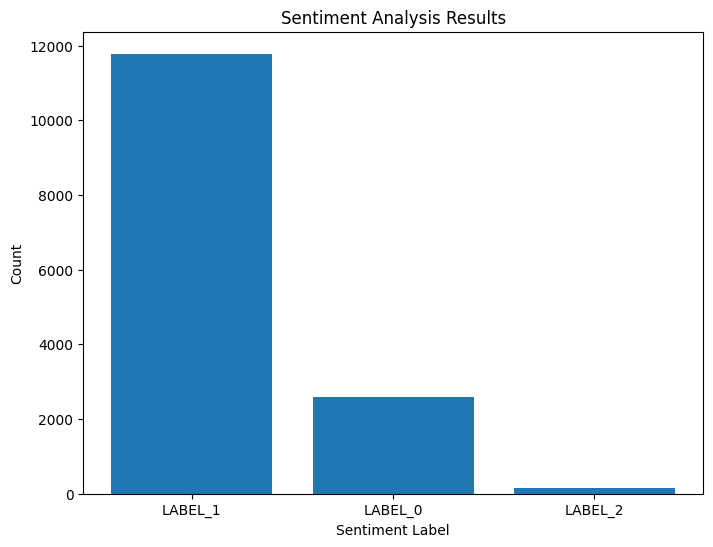

In [15]:
# the sentiment analysis using pretained bahasa indonesia

!pip install transformers
from transformers import pipeline
import pandas as pd # import pandas for data processing
import matplotlib.pyplot as plt # Import for bar chart

pretrained= "mdhugol/indonesia-bert-sentiment-classification"

# Assuming 'titles' is a pandas Series containing your cleaned and stemmed titles
if not df.empty:
  titles = df['Title']

  # Perform sentiment analysis using a pre-trained Indonesian model
  from transformers import AutoTokenizer, AutoModelForSequenceClassification # Import for sentiment model

  model = AutoModelForSequenceClassification.from_pretrained(pretrained)
  tokenizer = AutoTokenizer.from_pretrained(pretrained)

  sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

  label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

  # Ensure all titles are strings and handle potential NaNs
  titles = titles.apply(lambda x: str(x) if not pd.isnull(x) else '') # Convert to string and replace NaNs with empty strings
  
  sentiment_results = [sentiment_analysis(title) for title in titles] # Get sentiment for each title

  # Extract sentiment labels and scores
  labels = [result[0]['label'] for result in sentiment_results] # Access the results
  scores = [result[0]['score'] for result in sentiment_results]

  # Create a DataFrame to store sentiment analysis results
  sentiment_df = pd.DataFrame({'Title': titles, 'Sentiment': labels, 'Score': scores})

  # Count the occurrences of each sentiment label
  sentiment_counts = sentiment_df['Sentiment'].value_counts()

  # Create a bar chart
  plt.figure(figsize=(8, 6))
  plt.bar(sentiment_counts.index, sentiment_counts.values)
  plt.xlabel('Sentiment Label')
  plt.ylabel('Count')
  plt.title('Sentiment Analysis Results')
  plt.show()

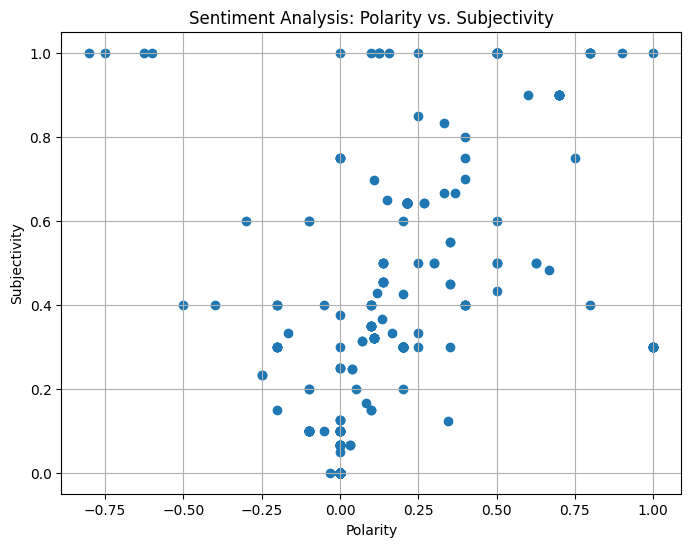

                                                   Title  Polarity  \
0        -- Perpusnas Beri Penghargaan Nugra Jasa Dharma       0.0   
1      'Amazing', Ada Kampung Ingris di Atas Bukit di...       0.6   
2      ‘Fotografer dan Dosanya’ Juarai Lomba Cerpen P...       0.0   
3      ‘Gelora’ Bikin Tingkat Literasi SMPN 2 Bojongm...       0.0   
4      ‘Kamar Kinclong Princess Tania’ Gemakan Semang...       0.0   
...                                                  ...       ...   
14522                                                NaN       0.0   
14523                                                NaN       0.0   
14524                                                NaN       0.0   
14525                                                NaN       0.0   
14526                                                NaN       0.0   

       Subjectivity  
0               0.0  
1               0.9  
2               0.0  
3               0.0  
4               0.0  
...             ...  
14522

In [19]:
#the subjectivity and polarity score 

import nltk
import spacy
import gensim
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string
from textblob import TextBlob

# ... (Your existing code) ...

if not df.empty:
    # Assuming 'Title' is the column containing the text data for sentiment analysis
    titles = df['Title']

    # Convert NaNs or floats to strings before applying split
    titles = titles.astype(str)

    # Perform sentiment analysis using TextBlob
    polarity_scores = []
    subjectivity_scores = []
    for title in titles:
        analysis = TextBlob(title)
        polarity_scores.append(analysis.sentiment.polarity)
        subjectivity_scores.append(analysis.sentiment.subjectivity)

    # Add polarity and subjectivity scores to the DataFrame
    df['Polarity'] = polarity_scores
    df['Subjectivity'] = subjectivity_scores

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Polarity'], df['Subjectivity'])
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.title('Sentiment Analysis: Polarity vs. Subjectivity')
    plt.grid(True)
    plt.show()

    # Print the DataFrame with polarity and subjectivity scores
    print(df[['Title', 'Polarity', 'Subjectivity']])

In [27]:
#  keyword analysis for bahasa indonesia

from collections import Counter

if not df.empty:
  # Assuming 'Title' is the column containing the text data for keyword analysis
  titles = df['Title']

  # Convert NaNs or floats to strings before applying split
  titles = titles.astype(str)

  # Combine all titles into a single string
  all_titles = ' '.join(titles)

  # Tokenize the text (split into words)
  tokens = all_titles.split()

  # Remove stop words (if needed) and perform stemming/lemmatization
  # You can customize this step based on your specific needs
  stop_words = set(stopwords.words('indonesian'))
  # Remove specific words from the titles (e.g., "Berita", "Tentang")
  words_to_remove = ["dan", "di"]
  for word in words_to_remove:
    titles = titles.str.replace(word, '', regex=False)

  tokens = [word for word in tokens if word.lower() not in stop_words]

  # Create a stemmer for Bahasa Indonesia (optional)
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  tokens = [stemmer.stem(word) for word in tokens]

  # Count word frequencies
  word_counts = Counter(tokens)

  # Get the top N most frequent words
  top_n = 10  # You can adjust the number of keywords you want
  most_common_words = word_counts.most_common(top_n)

  # Print the most frequent words
  print("Most Frequent Words:")
  for word, count in most_common_words:
    print(f"{word}: {count}")

  # You can also use TF-IDF to find important keywords
  # ... (TF-IDF code) ...

Most Frequent Words:
pustaka: 3773
literasi: 2483
nan: 1996
tingkat: 1461
baca: 1301
perpusnas: 1120
gelar: 1116
latih: 913
masyarakat: 891
program: 731


In [35]:
# Delete Nan and give me trigam

if not df.empty:
  # Assuming 'Title' is the column containing the text data
  titles = df['Title']

  # Convert NaNs or floats to strings before applying split
  titles = titles.astype(str)

  # Remove rows with NaN values in the 'Title' column
  titles = titles.dropna()
  stop_words = set(stopwords.words('indonesian'))
  # Remove specific words from the titles (e.g., "Berita", "Tentang")
  words_to_remove = ["dan", "di"]
  for word in words_to_remove:
    titles = titles.str.replace(word, '', regex=False)

  # Function to generate trigrams
  def generate_trigrams(text):
    tokens = nltk.word_tokenize(text)
    trigrams = list(nltk.trigrams(tokens))
    return trigrams

  # Apply trigram generation to each title
  all_trigrams = []
  for title in titles:
      trigrams = generate_trigrams(title)
      all_trigrams.extend(trigrams)

  # Count trigram frequencies
  trigram_counts = Counter(all_trigrams)

  # Print the most frequent trigrams (e.g., top 10)
  top_n = 10
  most_frequent_trigrams = trigram_counts.most_common(top_n)
  print("Most Frequent Trigrams:")
  for trigram, count in most_frequent_trigrams:
      print(f"{trigram}: {count}")

Most Frequent Trigrams:
('Berbasis', 'Inklusi', 'Sosial'): 281
('Perpustakaan', 'Berbasis', 'Inklusi'): 231
('Transformasi', 'Perpustakaan', 'Berbasis'): 135
('Dinas', 'Perpustakaan', 'Kearsipan'): 114
('Tingkatkan', 'Minat', 'Baca'): 97
('Program', 'Transformasi', 'Perpustakaan'): 65
('Minat', 'Baca', 'Masyarakat'): 62
('Komisi', 'X', 'DPR'): 58
('Duta', 'Baca', 'Indonesia'): 57
('Tingkatkan', 'Literasi', 'Masyarakat'): 43
